In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження датасету
df = pd.read_csv("museum_visitors.csv")


In [ ]:
df


,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694
5,2014-06-01,29487,5751,2121,11036
6,2014-07-01,32378,5406,2239,13490
7,2014-08-01,37680,8619,1769,9139
8,2014-09-01,28473,61192,1073,5661
9,2014-10-01,27995,6488,1979,7356


In [ ]:
df.shape

(59, 5)

In [ ]:
df.isnull().sum()

Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64

In [ ]:
df[df.duplicated()]

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center


In [ ]:
df.dtypes

Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [ ]:
df['date'].str.split('-').str[0].unique()

array(['2014', '2015', '2016', '2017', '2018'], dtype=object)

In [ ]:
av_visit = round(df.drop(columns=['date']).mean())
av_visit

avila_adobe                             24062.0
firehouse_museum                         6473.0
chinese_american_museum                  2721.0
america_tropical_interpretive_center     7107.0
dtype: float64

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df_2018 = df[df['date'].dt.year == 2018]

min_visitors_2018 = df_2018[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].min()

max_visitors_2018 = df_2018[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].max()

print("Minimum visitors in 2018:\n", min_visitors_2018)

print("\nMaximum visitors in 2018:\n", max_visitors_2018)

Minimum visitors in 2018:
 avila_adobe                             14718
firehouse_museum                         3306
chinese_american_museum                  2146
america_tropical_interpretive_center     3180
dtype: int64

Maximum visitors in 2018:
 avila_adobe                             25173
firehouse_museum                         8013
chinese_american_museum                  4960
america_tropical_interpretive_center     5837
dtype: int64


In [ ]:
museums = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

df_2015 = df[df['date'].dt.year == 2015]

monthly_visitors = df_2015.groupby(df_2015['date'].dt.month)[museums].sum()

max_visitors = monthly_visitors.idxmax()
min_visitors = monthly_visitors.idxmin()

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

print(f"Month with the highest total visitors in 2015: {month[max_visitors[0] - 1]}")
print(f"Month with the lowest total visitors in 2015: {month[min_visitors[0] - 1]}")

Month with the highest total visitors in 2015: July
Month with the lowest total visitors in 2015: February


In [ ]:
summer_months = [6, 7, 8]  # June, July, August
winter_months = [12, 1, 2]  # December, January, February


summer_data = df_2018[df_2018['date'].dt.month.isin(summer_months)]
winter_data = df_2018[df_2018['date'].dt.month.isin(winter_months)]

summer_visitors = summer_data['avila_adobe'].sum()
winter_visitors = winter_data['avila_adobe'].sum()

print(f"Total visitors for Avila Adobe in summer 2018: {summer_visitors}")
print(f"Total visitors for Avila Adobe in winter 2018: {winter_visitors}")

Total visitors for Avila Adobe in summer 2018: 66122
Total visitors for Avila Adobe in winter 2018: 30983


In [ ]:
df_2016 = df[df['date'].dt.year == 2016]
correlation = df_2016[museums].corr()
correlation

,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
avila_adobe,1.000000,0.737200,0.089054,0.436561
firehouse_museum,0.737200,1.000000,0.553935,0.247389
chinese_american_museum,0.089054,0.553935,1.000000,0.443800
america_tropical_interpretive_center,0.436561,0.247389,0.443800,1.000000


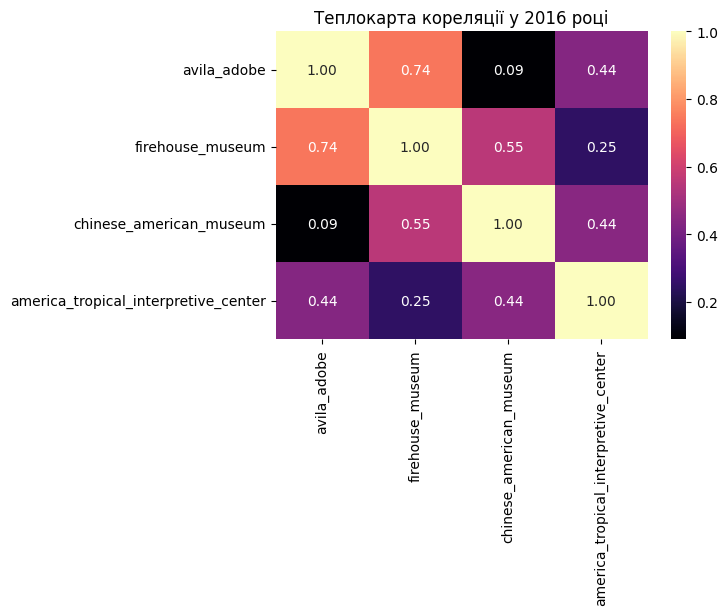

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="magma", fmt=".2f")
plt.title("Теплокарта кореляції у 2016 році")
plt.show()

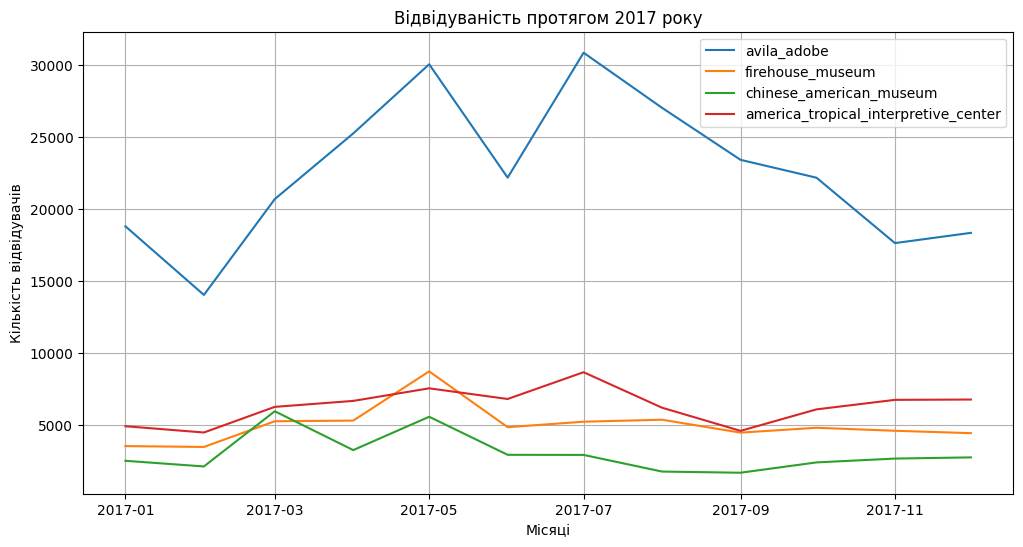

In [ ]:
df_2017 = df[df['date'].dt.year == 2017]

plt.figure(figsize=(12, 6))
for museum in museums:
    plt.plot(df_2017['date'], df_2017[museum], label=museum)

plt.title("Відвідуваність протягом 2017 року")
plt.xlabel("Місяці")
plt.ylabel("Кількість відвідувачів")
plt.legend()
plt.grid(True)
plt.show()

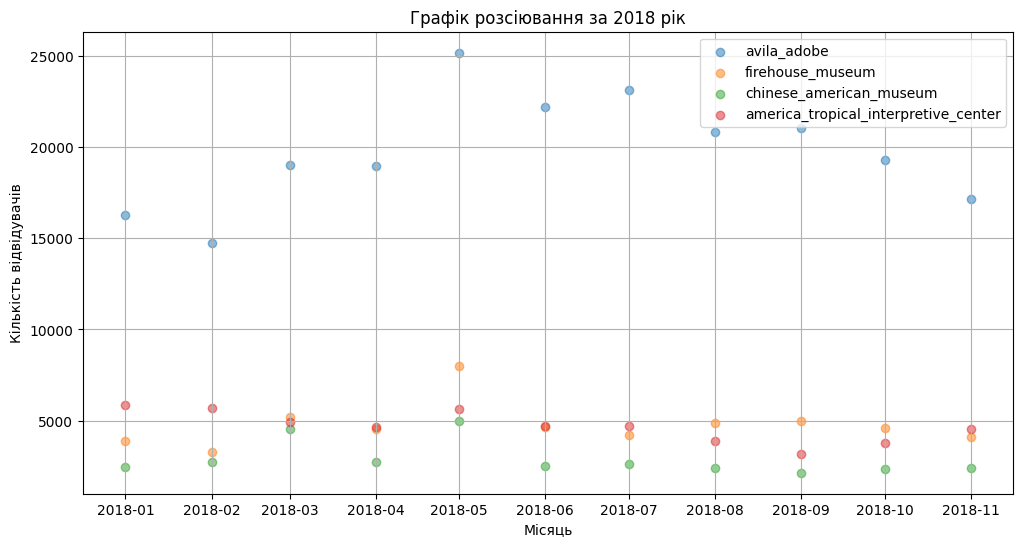

In [ ]:
plt.figure(figsize=(12, 6))
for museum in museums:
    plt.scatter(df_2018['date'], df_2018[museum], label=museum, alpha=0.5)

plt.title("Графік розсіювання за 2018 рік")
plt.xlabel("Місяць")
plt.ylabel("Кількість відвідувачів")
plt.legend()
plt.grid(True)
plt.show()

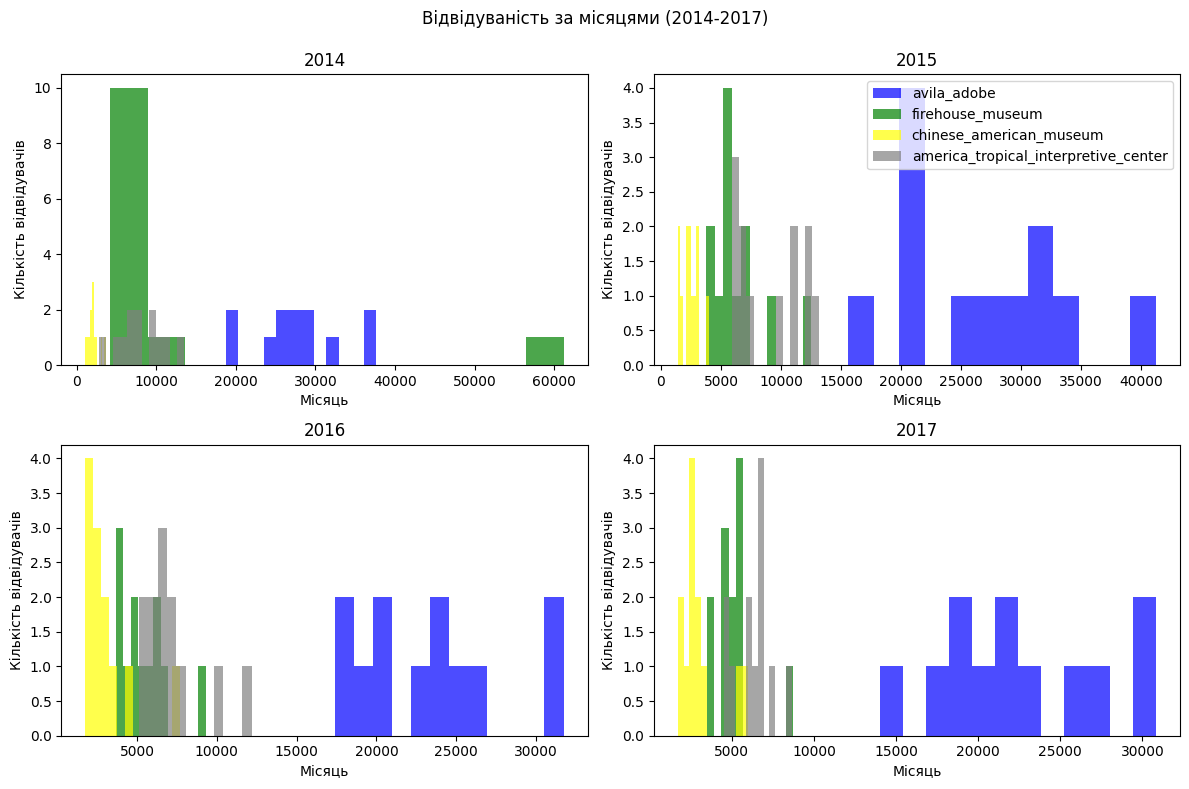

In [ ]:
years = [2014, 2015, 2016, 2017]
colors = ['blue', 'green', 'yellow', 'gray'] #колір для кожного графу

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Відвідуваність за місяцями (2014-2017)")

for i, year in enumerate(years):
    df_year = df[df['date'].dt.year == year]

    # дані за місяцями та загальна кількість відвідувачів за кожен місяць
    monthly_visitors = df_year.groupby(df_year['date'].dt.month)[museums].sum()

    # Побудова гістограм для кожного музею
    for j, museum in enumerate(museums):
        ax = axes[i // 2, i % 2]
        ax.hist(monthly_visitors[museum], bins=12, color=colors[j], label=museum, alpha=0.7)

        ax.set_title(f"{year}")
        ax.set_xlabel("Місяць")
        ax.set_ylabel("Кількість відвідувачів")

        if i == 1:
            ax.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()